<a href="https://colab.research.google.com/github/alejandraberbesi/Notebooks_DA/blob/main/2_Estadistica_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algo de terminologia antes de empezar

En estadística y análisis de datos, las variables se clasifican en diferentes tipos según la naturaleza de la información que representan. Aquí están los tipos principales de variables:

**Variables Categóricas**:

* Nominales: Representan categorías sin un orden inherente. Ejemplos: color, género.
* Ordinales: Tienen un orden, pero las diferencias entre los valores no son significativas. Ejemplos: nivel educativo (primaria, secundaria, universidad).

**Variables Numéricas**:

* Discretas: Representan valores contables y separados. Ejemplos: cantidad de hijos, número de estudiantes.
* Continuas: Pueden tomar cualquier valor en un rango. Ejemplos: altura, peso, temperatura.

**Variables Binarias**: Representan dos categorías mutuamente excluyentes, a menudo codificadas como 0 o 1. Ejemplos: sí/no, éxito/fracaso.

**Variables de Texto o Cadenas**: Ejemplos: descripciones.

**Variables Temporales**: Representan información temporal. Ejemplos: fecha, hora.

# Librerias que vamos a usar

In [ ]:
import numpy as np  #operaciones con arrays o estructuras de datos
import statistics

import matplotlib.pyplot as plt #libreria base de las visualizaciones
import seaborn as sns #libreria de visualizacion

# Medidas de tendencia central

Estas medidas proporcionan un punto de referencia para comprender la posición central de la distribución de datos.

**La media**, también conocida como promedio, es la suma de todos los valores en un conjunto de datos dividida por el número total de observaciones.

In [ ]:
datos = [10, 15, 20, 25, 30]
media = sum(datos) / len(datos)
print("Media:", media)

Media: 20.0


In [ ]:
#con libreria numpy
np.average([10, 15, 20, 25, 30])

20.0

**La mediana** es el valor que se encuentra en el centro de un conjunto de datos ordenado. Para calcularla, primero ordenamos los datos y luego seleccionamos el valor medio. Si el número de observaciones es par, la mediana es el promedio de los dos valores centrales.

**Mas robusta a valores extremos**

<img src="https://www.statology.org/wp-content/uploads/2018/09/mean_dist3.jpg" alt="drawing" width="500"/>

In [ ]:
#mediana usando libreria

datos = [10, 15, 20, 25, 30]

mediana = np.median(datos)
print("Mediana:", mediana)

Mediana: 20.0


In [ ]:
#antes del proximo calculo, indices en listas de python:
datos[0] #primer elemento

10

In [ ]:
n=9

n//2 # n // 2 es la división entera de n entre 2

4

In [ ]:
#mediana SIN libreria
datos = [10, 15, 30, 25, 20]

# Ordenar los datos, de menor a mayor:
datos_ordenados = sorted(datos)

n = len(datos_ordenados)

# Calcular la mediana
if n % 2 == 0:
    mediana = (datos_ordenados[n // 2 - 1] + datos_ordenados[n // 2]) / 2
else:
    mediana = datos_ordenados[n // 2] # n // 2 es el indice de la división entera de n entre 2

print("Mediana:", mediana)

Mediana: 20


**La moda** es el valor que aparece con mayor frecuencia en un conjunto de datos.
* Un conjunto de datos puede tener una moda (unimodal), más de una moda (multimodal) o no tener moda si todos los valores son únicos.

In [ ]:
#proceso con libreria "statistics":

categorias = ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'C']# Ejemplo de variables categóricas

moda_con_libreria = statistics.mode(categorias) #hallando la moda

print("Moda es:", moda_con_libreria)


Moda es: A


In [ ]:
def calcular_moda(datos):

    frecuencias = {} #creando diccionario vacio


    for dato in datos:  #llenar el diccionario con frecuencias
        if dato in frecuencias:
            frecuencias[dato] += 1
        else:
            frecuencias[dato] = 1  #diccionario quedaria: {'A':1,'B':1,'C':1}

    print(frecuencias)

    moda = max(frecuencias, key=frecuencias.get) #devuelve la clave (categoría) que tiene la frecuencia máxima en el diccionario frecuencias.

    return moda

# Ejemplo de variables categóricas
categorias = ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'C']

moda_calculada = calcular_moda(categorias)

print("Moda:", moda_calculada)


{'A': 4, 'B': 2, 'C': 2}
Moda: A


# Medidas de dispersion

 Dan información sobre la extensión o dispersión de un conjunto de datos.

 **El rango** es la diferencia entre el valor máximo y el valor mínimo en un conjunto de datos. Proporciona una indicación simple de la variabilidad de los datos. Es sensible a valores atípicos.

In [ ]:
datos_rango = [15, 20, 25, 30, 35]
rango_calculado = max(datos_rango) - min(datos_rango)

print("Rango:", rango_calculado)

Rango: 20


**La varianza** mide qué tan dispersos están los valores de un conjunto de datos con respecto a la media. Es útil para comparar la variabilidad relativa entre diferentes conjuntos de datos y necesario para calcular la desviacion estandar.

In [ ]:
datos_varianza = [15, 20, 25, 30, 35]
varianza_calculada = statistics.variance(datos_varianza)

print("Varianza:", varianza_calculada)

Varianza: 62.5


In [ ]:
#version semi-manual:
datos_varianza = [15, 20, 25, 30, 35]

media= np.average(datos_varianza)

calculo_numerador= [(x - media) ** 2 for x in datos_varianza] #list comprehension para una parte

print(calculo_numerador)
print(f"La varianza es: {sum(calculo_numerador)/(len(calculo_numerador)-1)}")

[100.0, 25.0, 0.0, 25.0, 100.0]
La varianza es: 62.5


In [ ]:
#creacion funcion con calculo manual
def calcular_varianza(datos):

    media = sum(datos) / len(datos)
    suma_cuadrados_diff = sum([(x - media) ** 2 for x in datos_varianza])

    varianza = suma_cuadrados_diff / (len(datos)-1) #formula de la varianza

    return varianza

varianza_calculada = calcular_varianza(datos_varianza)

print("Varianza:", varianza_calculada)

Varianza: 62.5


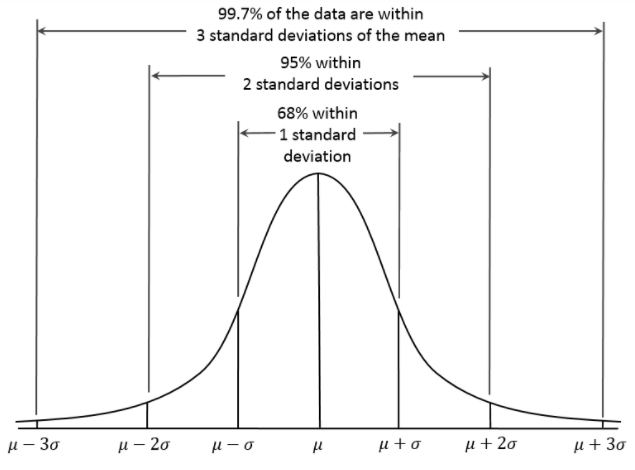

**La desviación estándar** es la raíz cuadrada positiva de la varianza y proporciona una medida de dispersión en las mismas unidades que los datos originales. **Es más fácil de interpretar que la varianza porque no queda en unidades cuadradas**.

In [ ]:

datos_desviacion = [15, 20, 25, 30, 35]
desviacion_calculada = statistics.stdev(datos_desviacion)

print("Desviación Estándar:", desviacion_calculada)

Desviación Estándar: 7.905694150420948


In [ ]:
desviacion_estandar = varianza_calculada ** (1/2) #raiz cuadrada de la varianza de la variable calculada previamente
desviacion_estandar

7.905694150420948

# Medidas de posicion

## Percentiles

Medida estadística que indica el valor por debajo del cual se encuentra un porcentaje específico de observaciones en un conjunto de datos ordenado.
* Los percentiles dividen un conjunto de datos en 100 partes iguales, y cada percentil representa un porcentaje. Por ejemplo, el percentil 25 (o primer cuartil) indica que el 25% de los datos están por debajo de ese valor.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fosinteresa.com%2Fwp-content%2Fuploads%2F2016%2F08%2FPercentiles_02-1106x1024.jpg&f=1&nofb=1&ipt=0d378f2ec36390656ee8d5154ba7d7eba2e01786c2fef14e239eb53d1a25cb59&ipo=images" alt="drawing" width="500"/>

**Ejemplo**:
Supongamos que tenemos una lista de alturas de estudiantes y queremos calcular el percentil 85. Esto nos dará el valor por debajo del cual se encuentra el 85% de las alturas.

In [ ]:
# Alturas de estudiantes en centímetros
alturas = [150, 155, 160, 165, 170, 175, 180, 185, 190]

In [ ]:
#con libreria numpy

print("Percentil 85:", np.percentile(alturas,
                                      85,
                                      method='nearest'))
#cuando se usa method='nearest'se devuelve el valor más cercano en el conjunto de datos, no se interpola ni crea un valor nuevo

Percentil 85: 185


In [ ]:
def percentil(data, perc):

    # Ordenar los datos de menor a mayor
    sorted_data = sorted(data)

    # Calcular el índice del percentil
    size = len(sorted_data)
    index = (perc * (size - 1)) / 100 #formula matematica pre establecida

    # Redondear al entero más cercano
    nearest_index = round(index)

    # Retornar el valor en el índice redondeado
    return sorted_data[nearest_index]

# Calcular el percentil 85
percentil_85 = percentil(alturas, 85)

print("Percentil 85 más cercano:", percentil_85)

Percentil 85 más cercano: 185


## Cuartiles

Los cuartiles son tres valores que dividen un conjunto de datos ordenado en cuatro partes iguales. Estos cuartiles son conocidos como:

* Primer Cuartil (Q1): Es el valor por debajo del cual se encuentra el 25% de los datos.
* Segundo Cuartil (Q2 o Mediana): Es el valor por debajo del cual se encuentra el 50% de los datos.
* Tercer Cuartil (Q3): Es el valor por debajo del cual se encuentra el 75% de los datos.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F1.bp.blogspot.com%2F-Kpg7lePMhhk%2FUOb6Ct-ky4I%2FAAAAAAAAALY%2F3cWGjWZNaNg%2Fs1600%2FDibujow.bmp&f=1&nofb=1&ipt=a3ac038b263c07e54fd017c1ceeb1b54fa9822dfb0b8ab46784d2c62ade24c25&ipo=images" alt="drawing" width="500"/>

In [ ]:
# Alturas de estudiantes en centímetros
alturas = [150, 155, 160, 165, 170, 175, 180, 185, 190]

# Calcular los cuartiles usando NumPy
q1 = np.percentile(alturas, 25,method='nearest')
q2 = np.percentile(alturas, 50,method='nearest')  # Esto es equivalente a la mediana
q3 = np.percentile(alturas, 75,method='nearest')

print("Primer Cuartil (Q1):", q1)
print("Segundo Cuartil (Q2 o Mediana):", q2)
print("Tercer Cuartil (Q3):", q3)

Primer Cuartil (Q1): 160
Segundo Cuartil (Q2 o Mediana): 170
Tercer Cuartil (Q3): 180


# Visualizaciones de distribuciones

### Histogramas

Un histograma es una representación gráfica de la distribución de un conjunto de datos. Se utiliza para visualizar la frecuencia con la que ocurren diferentes valores en un conjunto de datos y proporciona una visión general de la forma de la distribución. En un histograma, los datos se dividen en intervalos o "bins", y la altura de cada barra representa la frecuencia o la cantidad de datos en cada intervalo.

**Ejemplo:**

Imagina que tienes una lista de calificaciones de estudiantes. Un histograma, mostraría en qué rangos se agrupan esas calificaciones, y podrías ver qué tan frecuentemente aparecen en esos rangos.

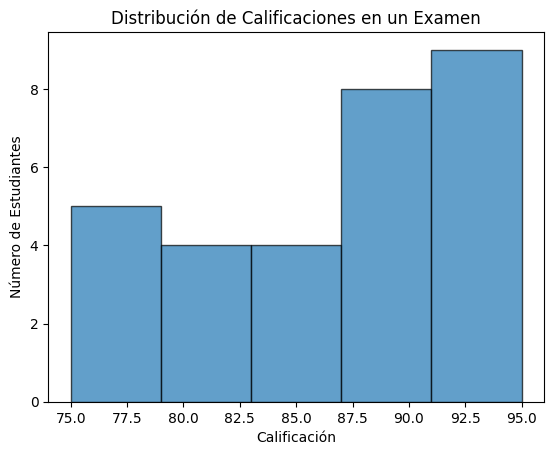

In [ ]:

# Datos reales de calificaciones de estudiantes en un examen
calificaciones = [85, 90, 78, 92, 88, 76, 95, 89, 82, 91,
                  79, 87, 93, 84, 88, 75, 94, 86, 80, 90,
                  77, 92, 89, 81, 83, 95, 87, 91, 78, 94]

# Crear histograma
plt.hist(calificaciones,
         bins=5,  # Ajusta el número de bins según tus necesidades
         edgecolor='black',
         alpha=0.7)   #cambiando intensidad del color de las barras

# Agregar etiquetas y título
plt.xlabel('Calificación')
plt.ylabel('Número de Estudiantes')
plt.title('Distribución de Calificaciones en un Examen')

# Mostrar el histograma
plt.show()

### Diagramas de densidad

Un diagrama de densidad es una representación gráfica de la distribución de probabilidad de un conjunto de datos.  Mientras que un histograma divide los datos en intervalos y cuenta la frecuencia en cada intervalo, un diagrama de densidad suaviza esta información para proporcionar una vista continua de la distribución de probabilidad.

**Ejemplo:**

Cuando miras un diagrama de densidad, puedes identificar fácilmente dónde hay más concentración de calificaciones. Si la línea es alta en un área, significa que hay muchas calificaciones alrededor de ese valor. Si la línea es baja, hay menos calificaciones en ese rango.

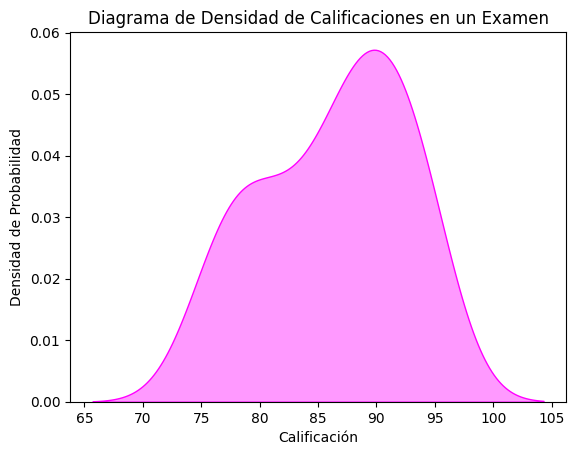

In [ ]:

# Datos reales de calificaciones de estudiantes en un examen
calificaciones = [85, 90, 78, 92, 88, 76, 95, 89, 82, 91,
                  79, 87, 93, 84, 88, 75, 94, 86, 80, 90,
                  77, 92, 89, 81, 83, 95, 87, 91, 78, 94]

# Crear diagrama de densidad usando seaborn
sns.kdeplot(calificaciones,
            fill=True, #relleno en colores
            color="magenta",
            alpha=0.4) #transparencia

# Agregar etiquetas y título
plt.xlabel('Calificación')
plt.ylabel('Densidad de Probabilidad')
plt.title('Diagrama de Densidad de Calificaciones en un Examen')

# Mostrar el diagrama de densidad
plt.show()

### Diagrama de caja

Un diagrama de caja, también llamado "boxplot", proporciona una manera rápida de visualizar la distribución de un conjunto de datos y resaltar la presencia de valores atípicos (outliers). La caja muestra la mediana y los cuartiles, mientras que los "bigotes" indican la dispersión general de los datos. Los puntos fuera de los bigotes son considerados outliers.

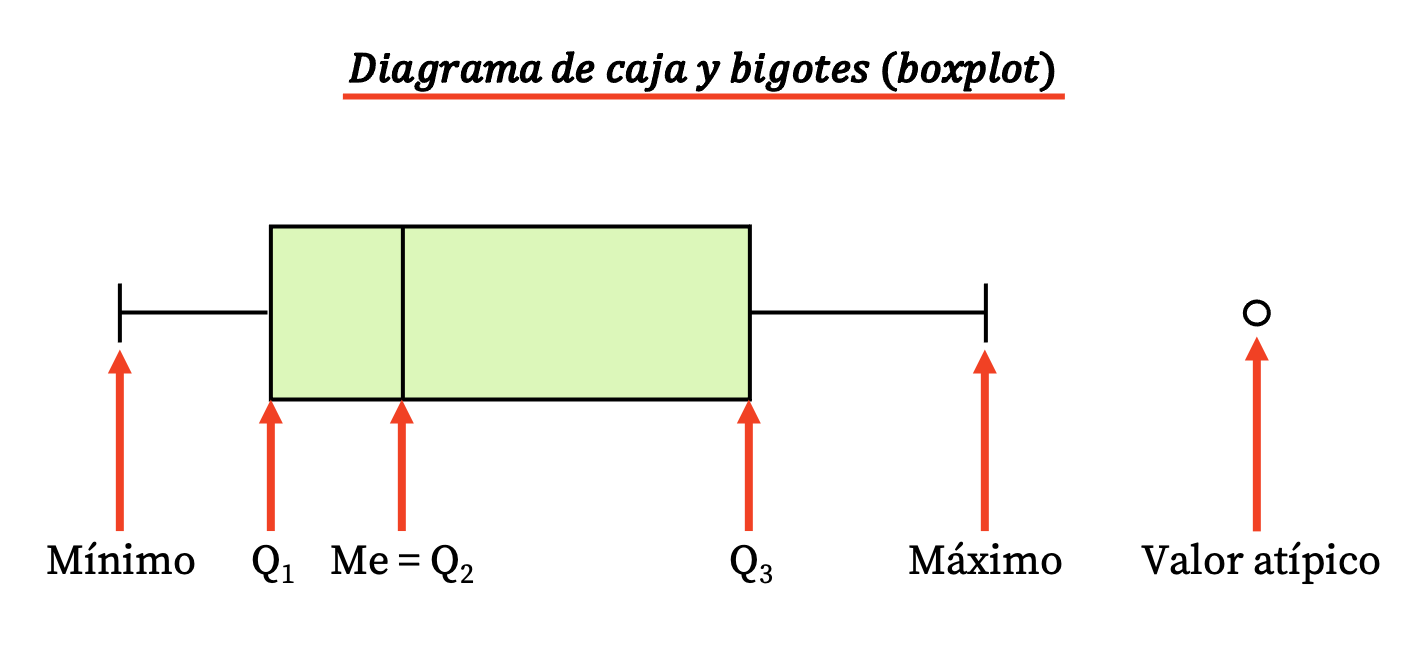

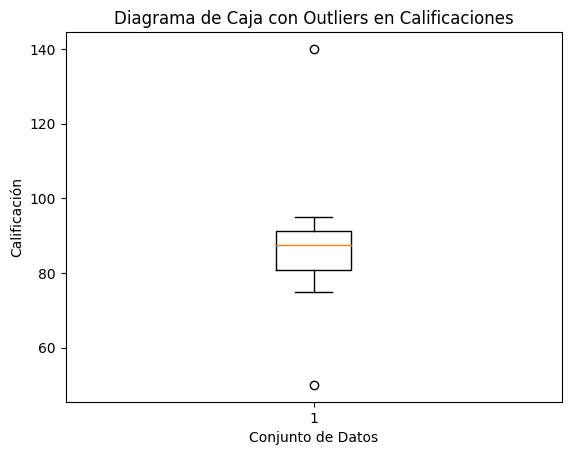

In [ ]:

# Datos reales de calificaciones de estudiantes en un examen, incluyendo outliers
calificaciones = [85, 90, 78, 92, 88, 76, 95, 89, 82, 91,
                  79, 87, 93, 84, 88, 75, 94, 86, 80, 90,
                  77, 92, 89, 81, 83, 95, 87, 91, 78, 94,
                  50, 140]  # Incluyendo un outlier bajo y uno alto

# Crear diagrama de caja
plt.boxplot(calificaciones)

# Agregar etiquetas y título
plt.xlabel('Conjunto de Datos')
plt.ylabel('Calificación')
plt.title('Diagrama de Caja con Outliers en Calificaciones')

# Mostrar el diagrama de caja
plt.show()


**Calculos manuales de construccion del diagrama:**

In [ ]:

# Datos reales de calificaciones de estudiantes en un examen, incluyendo outliers
calificaciones = [85, 90, 78, 92, 88, 76, 95, 89, 82, 91,
                  79, 87, 93, 84, 88, 75, 94, 86, 80, 90,
                  77, 92, 89, 81, 83, 95, 87, 91, 78, 94,
                  50, 140] # Incluyendo un outlier bajo y uno alto

# Calcular cuartiles
Q1 = np.percentile(calificaciones, 25,method="nearest")
Q3 = np.percentile(calificaciones, 75,method="nearest")

# Calcular rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = [x for x in calificaciones if x < limite_inferior or x > limite_superior] #list comprehension

# Imprimir resultados
print(f'Cuartil 1 (Q1): {Q1}')
print(f'Cuartil 3 (Q3): {Q3}')
print(f'Rango Intercuartílico (IQR): {IQR}')
print(f'Límite Inferior: {limite_inferior}')
print(f'Límite Superior: {limite_superior}')
print(f'Outliers: {outliers}')


Cuartil 1 (Q1): 81
Cuartil 3 (Q3): 91
Rango Intercuartílico (IQR): 10
Límite Inferior: 66.0
Límite Superior: 106.0
Outliers: [50, 140]


### Graficos de dispersion

Un gráfico de dispersión es una representación visual de datos numericos en un plano cartesiano, donde cada punto representa un par de valores correspondientes a dos variables.

**Utilidad:**

- Detección de outliers: Puedes identificar valores atípicos que se desvían del patrón general en el gráfico.
- Análisis de correlación: Puedes calcular el coeficiente de correlación para cuantificar la fuerza y la dirección de la relación entre las dos variables.

**Ejemplo**

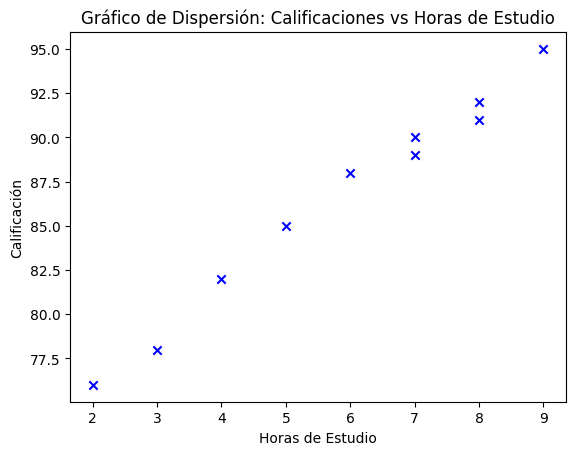

In [ ]:

calificaciones = [85, 90, 78, 92, 88, 76, 95, 89, 82, 91]
horas_estudio = [5, 7, 3, 8, 6, 2, 9, 7, 4, 8]

# Crear el gráfico de dispersión
plt.scatter(horas_estudio, calificaciones, color='blue', marker='x')

# Agregar etiquetas y título
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación')
plt.title('Gráfico de Dispersión: Calificaciones vs Horas de Estudio')

# Mostrar el gráfico
plt.show()


# Correlacion lineal

La correlación es una medida estadística que nos ayuda a entender la relación entre dos variables. Específicamente, la correlación cuantifica cómo los cambios en una variable están asociados con los cambios en otra variable. Sin embargo, es importante destacar que **la correlación no implica causalidad**. Esto significa que aunque dos variables puedan estar correlacionadas, no podemos asumir que un cambio en una variable causa directamente un cambio en la otra, solo que hay una conexión estadística entre las variables.


**Tendencia en Correlación:**

- Correlación Positiva: Ambas variables tienden a aumentar o disminuir juntas.

- Correlación Negativa: Una variable tiende a aumentar mientras la otra tiende a disminuir.

**Fuerza en Correlación:**

Existe un coeficiente de correlación que se mide en una escala de -1 a 1:

- Correlación Positiva:

  - Cerca de 1: Indica una correlación positiva fuerte.

  - Cerca de 0.5: Indica una correlación positiva moderada.

- Correlación Negativa:

  - Cerca de -1: Indica una correlación negativa fuerte.

  - Cerca de -0.5: Indica una correlación negativa moderada.

- Correlación Nula o Cercana a Cero: Una correlación cercana a 0 indica que no hay una relación lineal aparente entre las dos variables.

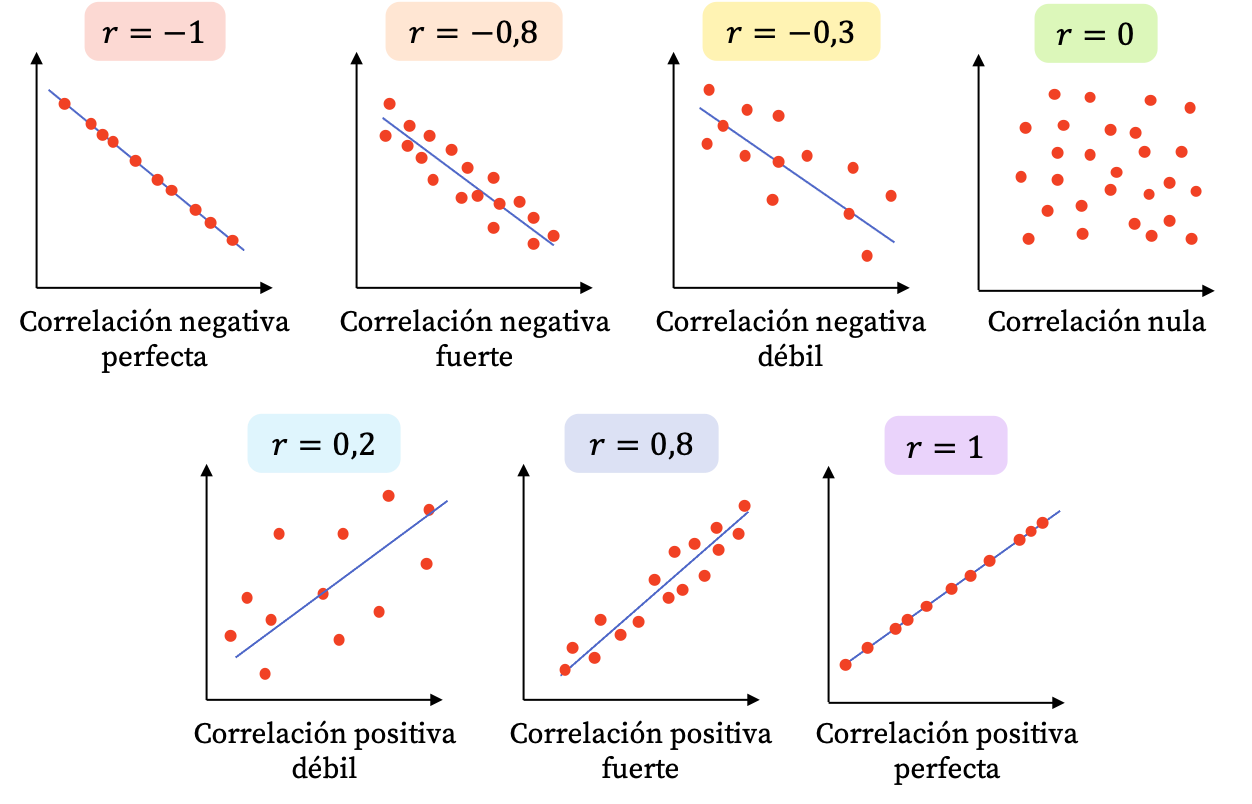

**Como se calcula el coeficiente:**

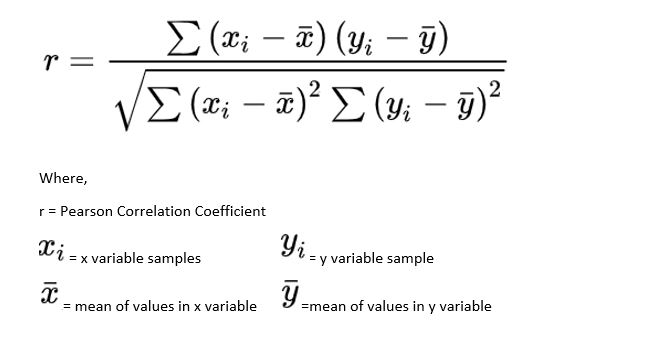

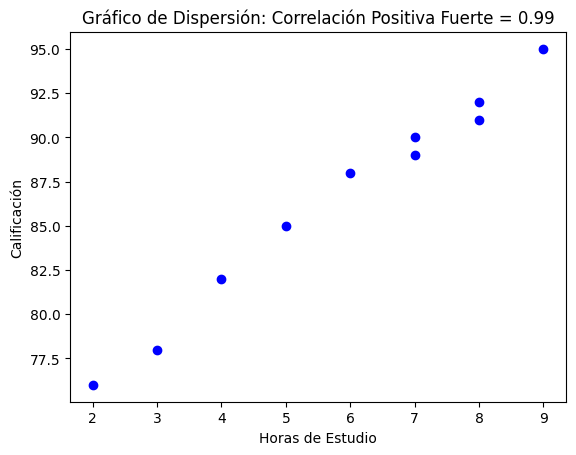

In [ ]:
horas_estudio = [5, 7, 3, 8, 6, 2, 9, 7, 4, 8]
calificaciones = [85, 90, 78, 92, 88, 76, 95, 89, 82, 91]

# Calcular la correlación entre horas de estudio y calificaciones
correlacion = np.corrcoef(horas_estudio, calificaciones)[0, 1]

# Crear el gráfico de dispersión
plt.scatter(horas_estudio, calificaciones, color='blue', marker='o')

# Agregar etiquetas y título
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación')
plt.title(f'Gráfico de Dispersión: Correlación Positiva Fuerte = {round(correlacion,2)}') #f-strings

# Mostrar el gráfico
plt.show()


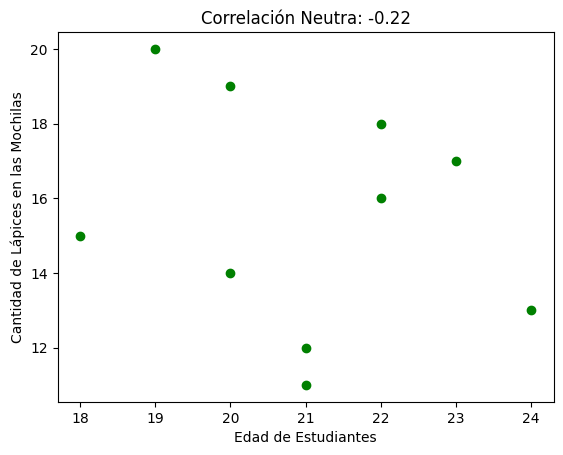

In [ ]:

edad_estudiantes = [18, 22, 19, 20, 21, 23, 20, 24, 22, 21]
cantidad_lapices = [15, 18, 20, 14, 12, 17, 19, 13, 16, 11]

# Calcular la correlación
correlacion_neutra = np.corrcoef(edad_estudiantes, cantidad_lapices)[0, 1]

# Crear el gráfico de dispersión
plt.scatter(edad_estudiantes, cantidad_lapices, color='green', marker='o')

# Agregar etiquetas y título
plt.xlabel('Edad de Estudiantes')
plt.ylabel('Cantidad de Lápices en las Mochilas')
plt.title(f'Correlación Neutra: {round(correlacion_neutra,2)}')

# Mostrar el gráfico
plt.show()


# Ejercicios

## Ejercicio 1



En una tienda de frutas, los pedidos son más complejos y vienen en un formato que incluye la cantidad de cada tipo de fruta y el precio por unidad. Tu tarea es crear una función llamada `analizar_pedido_frutas` que reciba un diccionario donde las claves son los nombres de las frutas y los valores son listas que contienen la cantidad y el precio por unidad de cada fruta. La función debe calcular la cantidad total de cada fruta, el costo total por tipo de fruta y la frecuencia relativa de cada tipo de fruta en relación con el total de frutas en el pedido.  Luego, debe devolver los resultados en un formato adecuado para que puedan mostrarse según se prefiera.

**Estructura del Input**

La función recibirá un diccionario donde las claves son los nombres de las frutas y los valores son listas que contienen la cantidad y el precio por unidad de cada fruta, por ejemplo:

```
pedido = {
    'manzana': [5, 0.5],
    'banana': [3, 0.2],
    'naranja': [8, 0.3]
}

```

## Ejercicio 2

Asume que se quieren analizar las ventas diarias durante un periodo de tiempo para entender mejor su comportamiento. Tu tarea es crear una función llamada `calcular_estadisticas_ventas` que reciba una lista de números que representan las ventas diarias. La función debe calcular el total de ventas, los percentiles 25, 50 (que es la mediana) y 75 de las ventas diarias y dar resultados en formato de diccionario.

**Estructura del Input**

La función recibirá una lista de números que representan las ventas diarias, por ejemplo:

`ventas = [100, 200, 150, 300, 250, 100, 50]`

## Ejercicio 3

Crea una función llamada calcular_correlacion que tomará dos listas de números (de igual longitud) y devolverá el coeficiente de correlación de Pearson entre ellas (no uses librerias, la idea es practicar el calculo manual).
Puedes tener en cuenta la siguiente fórmula para calcular el coeficiente de correlación de Pearson, representado por
𝑟:

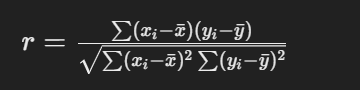

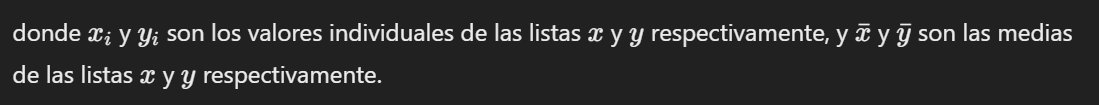

Mira el siguiente ejemplo si quieres mas contexto del calculo manual: https://docs.google.com/presentation/d/1_ajDRciPwfmuwfmLan9j_Yxj-SBzOOU0Ev4h-XWJhGw/edit?usp=sharing

Y puedes usar las siguientes listas como input:
```
x = [10, 20, 30, 40, 50,60]
y = [8, 16, 24, 32, 40,0]
```

## Ejercicio 4

Escribe una función detectar_outliers que reciba una lista de valores numéricos y utilice el rango intercuartílico (IQR) para identificar los límites para los outliers (mira tema de boxplots para recordar el concepto). La función debe imprimir los límites inferior y superior para los outliers y devolver dos listas: una con los valores que están dentro de los límites y otra con los valores que están fuera de los límites.

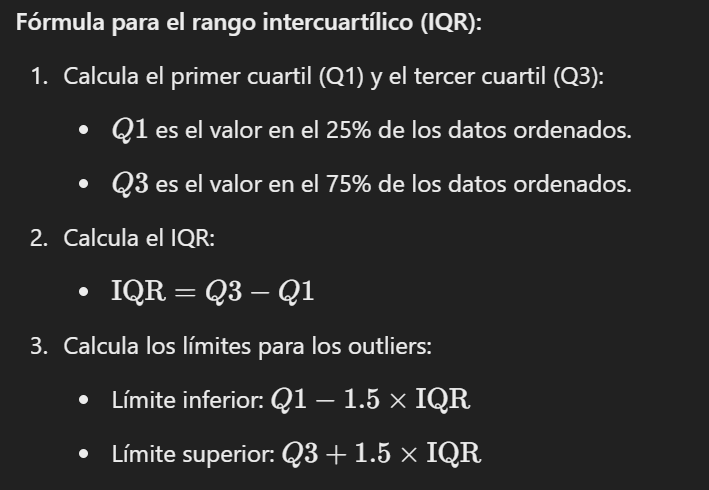

Puedes usar como input la siguiente lista:
```
valores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 100]
```
